In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
data_train = fetch_20newsgroups(subset="train")

data_test = fetch_20newsgroups(subset="test")

In [3]:
class2name = data_train.target_names 

print(class2name)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
X_train = data_train['data']
y_train = data_train['target']


X_test = data_test['data']
y_test = data_test['target']

In [5]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

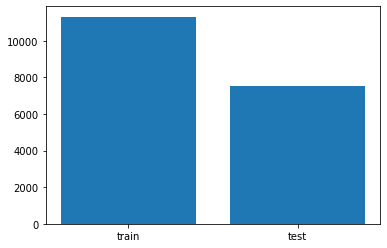

In [6]:
x = ("train", "test")
y = (len(X_train), len(X_test))

plt.bar(x, y)

In [7]:
explore_index = 5

In [8]:
#Explore target vector
print(y_train[explore_index])
print(X_train[explore_index])

16
From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagr

In [9]:
from collections import Counter

In [10]:
def explore_y(y):
    freq_classes = Counter(y)
    print(freq_classes)
    
    x = [class2name[i] for i in freq_classes.keys()]
    y = list(freq_classes.values())

    plt.bar(x, y)
    plt.xticks(rotation=90)


# Exploring train data - labels

Counter({10: 600, 15: 599, 8: 598, 9: 597, 11: 595, 7: 594, 13: 594, 14: 593, 5: 593, 2: 591, 12: 591, 3: 590, 6: 585, 1: 584, 4: 578, 17: 564, 16: 546, 0: 480, 18: 465, 19: 377})


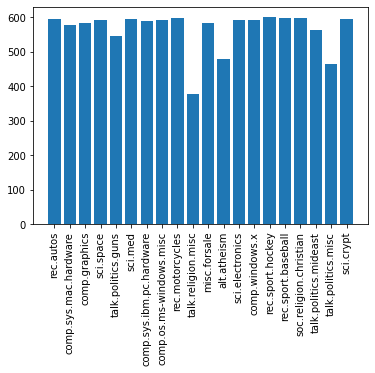

In [11]:
explore_y(y_train)

# Exploring test data - labels

Counter({10: 399, 15: 398, 8: 398, 9: 397, 7: 396, 13: 396, 11: 396, 5: 395, 2: 394, 14: 394, 12: 393, 3: 392, 6: 390, 1: 389, 4: 385, 17: 376, 16: 364, 0: 319, 18: 310, 19: 251})


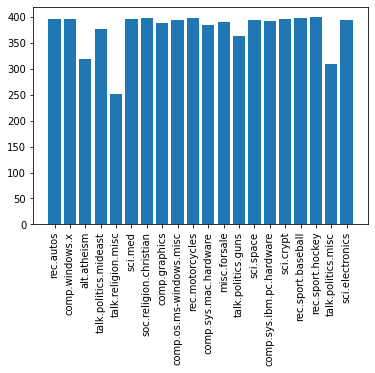

In [12]:
explore_y(y_test)

It is nice to have data in format which can be simple accessible -> convert to DataFrame.

In [13]:
import pandas as pd

In [14]:
def tranform_to_df(x, y):
    return pd.DataFrame({"text": x, "label": y})

In [15]:
train_df = tranform_to_df(X_train, y_train)
test_df = tranform_to_df(X_test, y_test)

In [16]:
train_df.head()

,text,label
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [17]:
test_df.head()

,text,label
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...,7
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...,5
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...,0
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...,17
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,19


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import string
from itertools import chain
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import numpy as np

In [19]:
no_preprocessed_texts = train_df['text'].values

STOP_WORDS = stopwords.words('english')

In [20]:
STOP_WORDS

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
def plot_most_common(texts, most_common, title="", count=None):
    counter_len = count
    tokenized = [t.split(" ") for t in texts[:counter_len]]
    tokenized_corpus = list(chain(*tokenized))
    freq = Counter(tokenized_corpus)
    MOST_COMMON = most_common
    common = freq.most_common(MOST_COMMON) 
    x, y = zip(*common)
    print(x)
    plt.bar(x, y)
    plt.title(title)
    plt.xticks(rotation=90)


('', 'the', 'to', 'of', 'a', 'and', 'is', 'in', 'that', 'I')


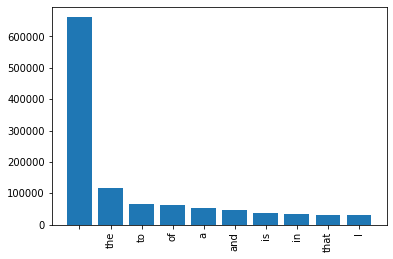

In [22]:
plot_most_common(no_preprocessed_texts, 10)

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
ps = PorterStemmer()

def preprocess_newsgroup(text):
    text = text.lower()
    
    table = str.maketrans('', '', string.punctuation) #every character is mapped to none (third argument)
    
    regex_to_remove = [
        r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)',
        r'subject:',
        r're:',
        r'from:'
        r'organization:',
        r'lines: ',        
    ]
    
    for r in regex_to_remove:
        text = re.sub(r, '', text)
        
    text = re.sub('\s', ' ', text)
    
    tokenized = text.split(' ')
    
    def process_word(word):
        word = word.translate(table)
        word = word.strip()
        word = ps.stem(word)
        return word
    
    tokenized = [process_word(token) for token in tokenized if token.isalpha() and token != '' and token not in STOP_WORDS]
    text = " ".join(tokenized)
    
    
    return text

In [25]:
text_preprocess = train_df['text'].values[0]
print(text_preprocess)
text_preprocess = preprocess_newsgroup(text_preprocess)
print(text_preprocess)

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





car univers colleg park wonder anyon could enlighten car saw sport look late earli call door realli front bumper separ rest anyon tellm model engin year car whatev info funki look pleas il brought neighborhood lerxst


In [26]:
preprocessed_text_key = 'preprocessed_text'

In [27]:
val = train_df['text'].values
train_df[preprocessed_text_key] = list(map(preprocess_newsgroup, val))

In [28]:
train_df.head()

,text,label,preprocessed_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,car univers colleg park wonder anyon could enl...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,si clock poll final call final call si clock r...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,e pb purdu univers engin comput network usa we...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,weitek harri comput system divis world tin rob...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,shuttl launch question smithsonian astrophys u...


('would', 'use', 'one', 'articl', 'get', 'like', 'x', 'univers', 'peopl', 'know')


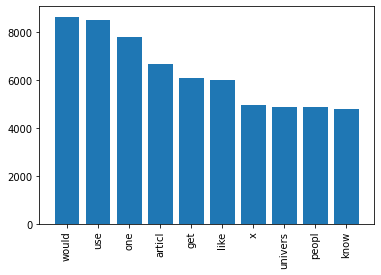

In [29]:
plot_most_common(train_df[preprocessed_text_key], 10)

In [30]:
tokenizer = Tokenizer()

In [31]:
tokenizer.fit_on_texts(train_df[preprocessed_text_key])

In [32]:
word_index = tokenizer.word_index

In [33]:
print(word_index)

{'would': 1, 'use': 2, 'one': 3, 'articl': 4, 'get': 5, 'like': 6, 'x': 7, 'univers': 8, 'peopl': 9, 'know': 10, 'think': 11, 'make': 12, 'go': 13, 'new': 14, 'also': 15, 'say': 16, 'could': 17, 'time': 18, 'want': 19, 'good': 20, 'even': 21, 'need': 22, 'may': 23, 'look': 24, 'work': 25, 'see': 26, 'mani': 27, 'system': 28, 'tri': 29, 'two': 30, 'take': 31, 'much': 32, 'right': 33, 'first': 34, 'comput': 35, 'way': 36, 'state': 37, 'thing': 38, 'call': 39, 'come': 40, 'anyon': 41, 'seem': 42, 'problem': 43, 'year': 44, 'believ': 45, 'post': 46, 'run': 47, 'us': 48, 'window': 49, 'file': 50, 'find': 51, 'world': 52, 'realli': 53, 'question': 54, 'sinc': 55, 'give': 56, 'someth': 57, 'read': 58, 'mean': 59, 'number': 60, 'program': 61, 'still': 62, 'point': 63, 'differ': 64, 'pleas': 65, 'back': 66, 'last': 67, 'must': 68, 'said': 69, 'might': 70, 'drive': 71, 'includ': 72, 'part': 73, 'help': 74, 'start': 75, 'god': 76, 'inform': 77, 'never': 78, 'got': 79, 'ask': 80, 'gener': 81, 'set

In [34]:
def class_words(texts, labels, index_of_class, count=None):
    test_number = 5
    
    t = texts[:count].values
    l = labels[:count].values
    
    
#     for i in range(len(class2name)):
    name = class2name[index_of_class]
    class_indicies = np.argwhere(l == index_of_class).flatten()
    selected_texts = list(t[class_indicies])


    if len(selected_texts) > 0:
        plot_most_common(selected_texts, 10, name)   


('one', 'would', 'peopl', 'say', 'articl', 'god', 'think', 'believ', 'make', 'like')


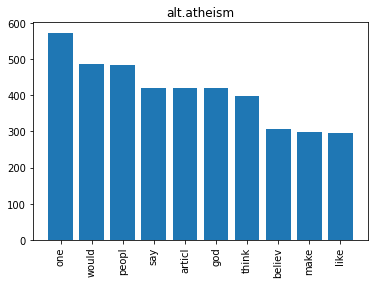

In [35]:
class_words(train_df[preprocessed_text_key], train_df['label'], 0)

('imag', 'use', 'file', 'graphic', 'program', 'univers', 'would', 'comput', 'need', 'get')


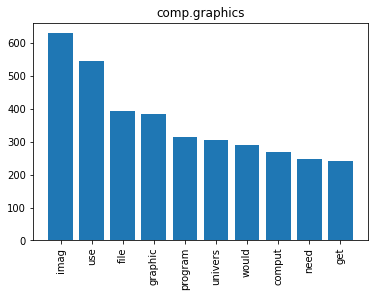

In [36]:
class_words(train_df[preprocessed_text_key], train_df['label'], 1)

('window', 'use', 'file', 'univers', 'driver', 'run', 'get', 'like', 'articl', 'do')


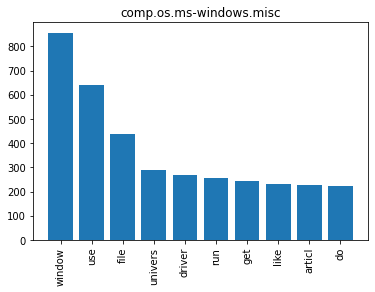

In [37]:
class_words(train_df[preprocessed_text_key], train_df['label'], 2)

('mac', 'use', 'appl', 'get', 'one', 'would', 'univers', 'know', 'problem', 'drive')


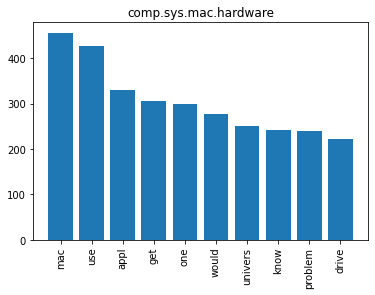

In [38]:
class_words(train_df[preprocessed_text_key], train_df['label'], 4)

('x', 'use', 'window', 'file', 'get', 'program', 'widget', 'run', 'server', 'entri')


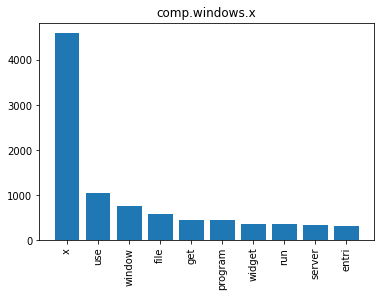

In [39]:
class_words(train_df[preprocessed_text_key], train_df['label'], 5)

('sale', 'univers', 'new', 'use', 'pleas', 'do', 'comput', 'includ', 'sell', 'ask')


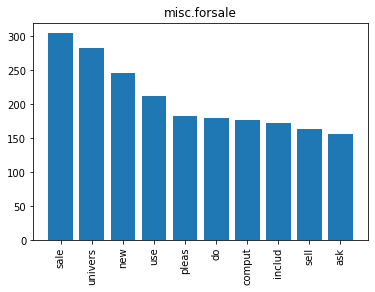

In [40]:
class_words(train_df[preprocessed_text_key], train_df['label'], 6)

('car', 'would', 'articl', 'get', 'like', 'use', 'one', 'good', 'univers', 'think')


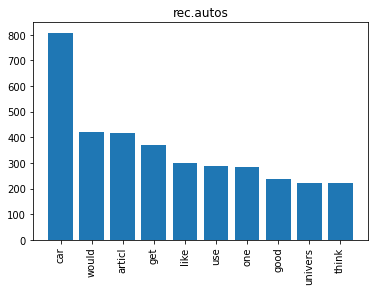

In [41]:
class_words(train_df[preprocessed_text_key], train_df['label'], 7)

('bike', 'articl', 'like', 'get', 'one', 'ride', 'dod', 'would', 'go', 'know')


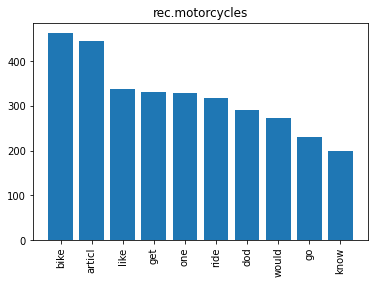

In [42]:
class_words(train_df[preprocessed_text_key], train_df['label'], 8)

('articl', 'game', 'team', 'would', 'like', 'think', 'last', 'one', 'year', 'get')


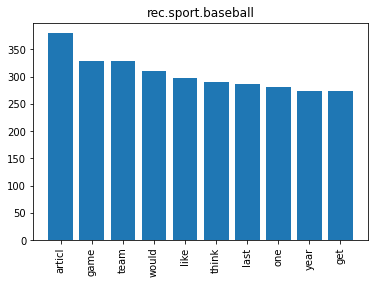

In [43]:
class_words(train_df[preprocessed_text_key], train_df['label'], 9)

('team', 'game', 'play', 'hockey', 'go', 'would', 'player', 'get', 'univers', 'one')


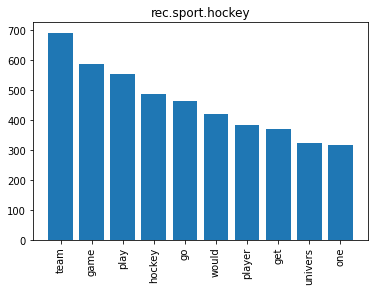

In [44]:
class_words(train_df[preprocessed_text_key], train_df['label'], 10)

('use', 'key', 'encrypt', 'would', 'chip', 'db', 'one', 'secur', 'clipper', 'govern')


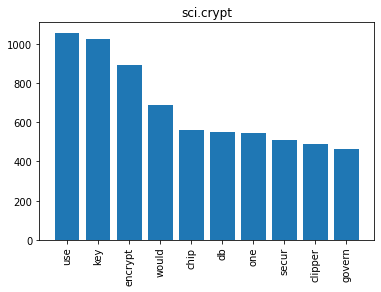

In [45]:
class_words(train_df[preprocessed_text_key], train_df['label'], 11)

('use', 'one', 'would', 'like', 'get', 'wire', 'need', 'univers', 'articl', 'know')


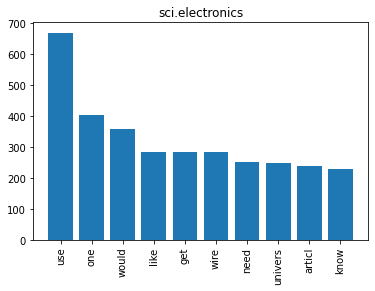

In [46]:
class_words(train_df[preprocessed_text_key], train_df['label'], 12)

('one', 'use', 'articl', 'would', 'get', 'like', 'medic', 'univers', 'know', 'peopl')


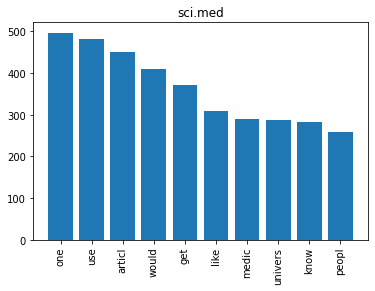

In [47]:
class_words(train_df[preprocessed_text_key], train_df['label'], 13)

('space', 'would', 'launch', 'use', 'articl', 'orbit', 'one', 'like', 'nasa', 'get')


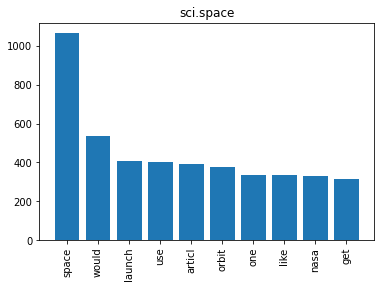

In [48]:
class_words(train_df[preprocessed_text_key], train_df['label'], 14)

('god', 'would', 'christian', 'one', 'peopl', 'believ', 'say', 'think', 'know', 'jesu')


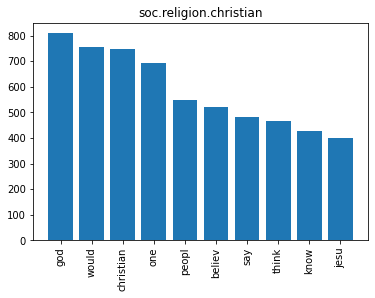

In [49]:
class_words(train_df[preprocessed_text_key], train_df['label'], 15)

('gun', 'would', 'peopl', 'use', 'articl', 'one', 'like', 'get', 'state', 'right')


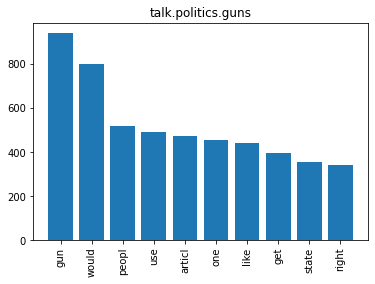

In [50]:
class_words(train_df[preprocessed_text_key], train_df['label'], 16)

('armenian', 'one', 'peopl', 'isra', 'would', 'turkish', 'israel', 'articl', 'go', 'jew')


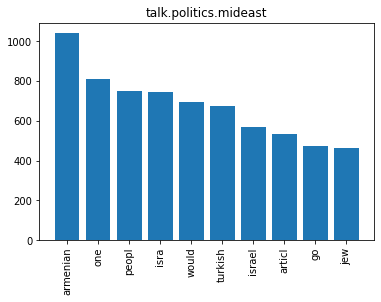

In [51]:
class_words(train_df[preprocessed_text_key], train_df['label'], 17)

('would', 'q', 'peopl', 'articl', 'go', 'think', 'one', 'make', 'get', 'presid')


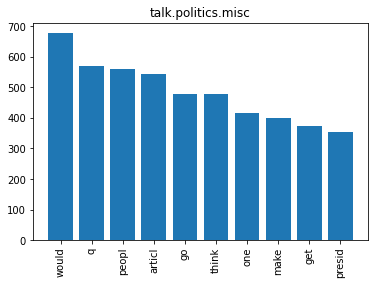

In [52]:
class_words(train_df[preprocessed_text_key], train_df['label'], 18)

('one', 'would', 'christian', 'peopl', 'articl', 'say', 'jesu', 'god', 'know', 'think')


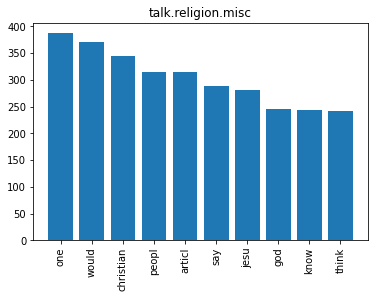

In [53]:
class_words(train_df[preprocessed_text_key], train_df['label'], 19)

# Prepare numeric representation for algs

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
NGRAM_RANGE = (1, 1)

In [56]:
count_vectorizer = CountVectorizer(ngram_range=NGRAM_RANGE)

In [57]:
X = count_vectorizer.fit_transform(train_df[preprocessed_text_key]) 

In [58]:
features = count_vectorizer.get_feature_names()[0:20]

In [59]:
features

['aa',
 'aaa',
 'aaaa',
 'aaah',
 'aaai',
 'aachen',
 'aah',
 'aalborg',
 'aaltern',
 'aam',
 'aamaz',
 'aamir',
 'aammmaaaazzzzzziinnnnggggg',
 'aan',
 'aanbieden',
 'aanerud',
 'aangeboden',
 'aangegeven',
 'aangezien',
 'aantal']

In [60]:
X.shape

(11314, 37716)

- MultinomialNB - it is used for text classification very often
- ComplementNB - it is suited for imbalanced data sets

In [61]:
y = train_df['label'].values

In [62]:
y

array([7, 4, 4, ..., 3, 1, 8])

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
clf = MultinomialNB()

In [65]:
clf.fit(X, y)

MultinomialNB()

In [66]:
test_df.head()
test_df[preprocessed_text_key] = list(map(preprocess_newsgroup, test_df['text'].values))

In [67]:
test_df.head()

,text,label,preprocessed_text
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...,7,need info bonnevil univers buffalo vnew littl ...
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...,5,rick miller world go swamp familiar format see...
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...,0,mathew strong weak atheism manti rusnew depart...
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...,17,saudi clergi condemn debut human right civil s...
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,19,say christian moral sgi world articl articl ar...


In [68]:
X_test = test_df[preprocessed_text_key].values
y_test = test_df['label']
X_test = count_vectorizer.transform(X_test)

In [69]:
X_test.shape

(7532, 37716)

In [70]:
pred = clf.predict(X_test)

In [71]:
y_test

0        7
1        5
2        0
3       17
4       19
        ..
7527    14
7528     4
7529     9
7530     6
7531    15
Name: label, Length: 7532, dtype: int32

In [72]:
pred

array([ 7,  1,  0, ...,  9,  3, 15])

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [74]:
accuracy = accuracy_score(y_test, pred)

In [75]:
accuracy

0.7780138077535848

In [76]:
from sklearn.naive_bayes import ComplementNB

In [77]:
clf_com = ComplementNB()

In [78]:
clf_com.fit(X, y)

ComplementNB()

In [79]:
pred = clf_com.predict(X_test)

In [80]:
accuracy = accuracy_score(y_test, pred)

In [81]:
accuracy

0.789166224110462

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tfidf = TfidfVectorizer()

In [84]:
X_train = tfidf.fit_transform(train_df[preprocessed_text_key]) 

In [85]:
X_train.shape

(11314, 37716)

In [86]:
from sklearn.metrics import classification_report

In [87]:
CLASSIFICATION_KEY = 'classification_rep'
ACCURACY_KEY = 'accuracy'

In [88]:
def make_metrics(true, pred, target_names = class2name):
    results = {}
    accuracy = accuracy_score(y_test, pred)
    classification_rep = classification_report(true, pred, target_names=target_names)
    results[ACCURACY_KEY] = accuracy
    results[CLASSIFICATION_KEY] = classification_rep
    return results
    

def make_classification(input_tuple, vectorizer_instance, classifiers_dic): #X_train, y_train, X_test, y_test
    results = {}
        
    X_train, y_train, X_test, y_test = input_tuple
    
    X_train = vectorizer_instance.fit_transform(X_train)
    X_test = vectorizer_instance.transform(X_test)
    
    
    for k, v in classifiers_dic.items():
        instance = v.fit(X_train, y_train)
        pred = v.predict(X_test)
        metrics = make_metrics(y_test, pred)
        results[k] = metrics 
        
    return results
        
    
    

In [89]:
from sklearn import svm
#https://scikit-learn.org/stable/modules/svm.html#svm-classification

In [90]:
COMMON_CLASSIFIERS = {
    'MultinomialNB': MultinomialNB(),
    'ComplementNB': ComplementNB(),
#     'SVC': svm.SVC(),
#     'LinearSVC': svm.LinearSVC()
}


Y_KEY = 'label'
TEXT_KEY_NOT_PREPROCESSED = 'text'


INPUT_TUPLE_PREPROCESSED = (
    train_df[preprocessed_text_key].values, 
    train_df[Y_KEY].values, 
    test_df[preprocessed_text_key].values, 
    test_df[Y_KEY].values 
)

INPUT_TUPLE_NOT_PREPROCESSED = (
    train_df[TEXT_KEY_NOT_PREPROCESSED].values, 
    train_df[Y_KEY].values, 
    test_df[TEXT_KEY_NOT_PREPROCESSED].values, 
    test_df[Y_KEY].values 
)


In [91]:
NUMBER_OF_PRINT = 2

In [92]:
INPUT_TUPLE_NOT_PREPROCESSED[0][:NUMBER_OF_PRINT]

array(["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
       "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washing

In [93]:
INPUT_TUPLE_PREPROCESSED[0][:NUMBER_OF_PRINT]

array(['car univers colleg park wonder anyon could enlighten car saw sport look late earli call door realli front bumper separ rest anyon tellm model engin year car whatev info funki look pleas il brought neighborhood lerxst',
       'si clock poll final call final call si clock report univers washington fair number brave soul upgrad si clock oscil share experi pleas send brief messag detail experi top speed cpu rate add card heat hour usag per floppi disk function floppi especi summar next two pleas add network knowledg base done clock upgrad answer guy kuo'],
      dtype=object)

In [94]:
DETAILED = False

In [95]:
def print_value_classification_results(value, name=''):
        print(f'\nNAME --------> {name}\n')
        print(value[ACCURACY_KEY])
        if DETAILED:
            print(value[CLASSIFICATION_KEY])

In [96]:
def print_classification_results(res):
    print(res)
    for k, v in res.items():
        print_value_classification_results(v, k)

        
            


# CountVectorizer preprocessed

In [97]:
count_vectorizer_instance = CountVectorizer(ngram_range=NGRAM_RANGE)
res = make_classification(INPUT_TUPLE_PREPROCESSED, count_vectorizer_instance, COMMON_CLASSIFIERS)

In [98]:
print_classification_results(res)

{'MultinomialNB': {'accuracy': 0.7780138077535848, 'classification_rep': '                          precision    recall  f1-score   support\n\n             alt.atheism       0.73      0.64      0.68       319\n           comp.graphics       0.69      0.75      0.72       389\n comp.os.ms-windows.misc       0.75      0.58      0.65       394\ncomp.sys.ibm.pc.hardware       0.66      0.72      0.69       392\n   comp.sys.mac.hardware       0.76      0.78      0.77       385\n          comp.windows.x       0.78      0.79      0.78       395\n            misc.forsale       0.90      0.61      0.73       390\n               rec.autos       0.85      0.90      0.87       396\n         rec.motorcycles       0.92      0.88      0.90       398\n      rec.sport.baseball       0.96      0.88      0.92       397\n        rec.sport.hockey       0.94      0.95      0.95       399\n               sci.crypt       0.71      0.92      0.81       396\n         sci.electronics       0.76      0.63      0.

# TF-IDF preprocessed

In [99]:
tfidf_instance = TfidfVectorizer()
res = make_classification(INPUT_TUPLE_PREPROCESSED, tfidf_instance, COMMON_CLASSIFIERS)

In [100]:
print_classification_results(res)

{'MultinomialNB': {'accuracy': 0.7652681890600106, 'classification_rep': '                          precision    recall  f1-score   support\n\n             alt.atheism       0.83      0.41      0.55       319\n           comp.graphics       0.78      0.67      0.72       389\n comp.os.ms-windows.misc       0.71      0.67      0.69       394\ncomp.sys.ibm.pc.hardware       0.65      0.75      0.70       392\n   comp.sys.mac.hardware       0.78      0.79      0.79       385\n          comp.windows.x       0.82      0.77      0.79       395\n            misc.forsale       0.93      0.62      0.74       390\n               rec.autos       0.88      0.90      0.89       396\n         rec.motorcycles       0.90      0.89      0.89       398\n      rec.sport.baseball       0.94      0.90      0.92       397\n        rec.sport.hockey       0.91      0.97      0.94       399\n               sci.crypt       0.65      0.96      0.77       396\n         sci.electronics       0.75      0.63      0.

# CountVectorizer not preprocessed

In [101]:
count_vectorizer_instance = CountVectorizer(ngram_range=NGRAM_RANGE)
res = make_classification(INPUT_TUPLE_NOT_PREPROCESSED, count_vectorizer_instance, COMMON_CLASSIFIERS)

In [102]:
print_classification_results(res)

{'MultinomialNB': {'accuracy': 0.7728359001593202, 'classification_rep': '                          precision    recall  f1-score   support\n\n             alt.atheism       0.79      0.77      0.78       319\n           comp.graphics       0.67      0.74      0.70       389\n comp.os.ms-windows.misc       0.20      0.00      0.01       394\ncomp.sys.ibm.pc.hardware       0.56      0.77      0.65       392\n   comp.sys.mac.hardware       0.84      0.75      0.79       385\n          comp.windows.x       0.65      0.84      0.73       395\n            misc.forsale       0.93      0.65      0.77       390\n               rec.autos       0.87      0.91      0.89       396\n         rec.motorcycles       0.96      0.92      0.94       398\n      rec.sport.baseball       0.96      0.87      0.91       397\n        rec.sport.hockey       0.93      0.96      0.95       399\n               sci.crypt       0.67      0.95      0.78       396\n         sci.electronics       0.79      0.66      0.

# TF-IDF not preprocessed

In [103]:
tfidf_instance = TfidfVectorizer()
res = make_classification(INPUT_TUPLE_NOT_PREPROCESSED, tfidf_instance, COMMON_CLASSIFIERS)

In [104]:
print_classification_results(res)

{'MultinomialNB': {'accuracy': 0.7738980350504514, 'classification_rep': '                          precision    recall  f1-score   support\n\n             alt.atheism       0.80      0.52      0.63       319\n           comp.graphics       0.81      0.65      0.72       389\n comp.os.ms-windows.misc       0.82      0.65      0.73       394\ncomp.sys.ibm.pc.hardware       0.67      0.78      0.72       392\n   comp.sys.mac.hardware       0.86      0.77      0.81       385\n          comp.windows.x       0.89      0.75      0.82       395\n            misc.forsale       0.93      0.69      0.80       390\n               rec.autos       0.85      0.92      0.88       396\n         rec.motorcycles       0.94      0.93      0.93       398\n      rec.sport.baseball       0.92      0.90      0.91       397\n        rec.sport.hockey       0.89      0.97      0.93       399\n               sci.crypt       0.59      0.97      0.74       396\n         sci.electronics       0.84      0.60      0.

# Deep learning




Imports

In [105]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

Deep learning config



In [106]:
BATCH_SIZE = 500
EPOCHS = 5
VALIDATION_SPLIT = 0.2

INPUT_TUPLE_PREPROCESSED
INPUT_TUPLE_NOT_PREPROCESSED

In [107]:
INPUT_TUPLE_PREPROCESSED

(array(['car univers colleg park wonder anyon could enlighten car saw sport look late earli call door realli front bumper separ rest anyon tellm model engin year car whatev info funki look pleas il brought neighborhood lerxst',
        'si clock poll final call final call si clock report univers washington fair number brave soul upgrad si clock oscil share experi pleas send brief messag detail experi top speed cpu rate add card heat hour usag per floppi disk function floppi especi summar next two pleas add network knowledg base done clock upgrad answer guy kuo',
        'e pb purdu univers engin comput network usa well mac plu final gave ghost weekend start life way back market new machin bit sooner intend look pick powerbook mayb bunch question somebodi anybodi know dirt next round powerbook introduct heard suppos make appear heard anymor sinc access wonder anybodi anybodi heard rumor price drop powerbook line like one went impress display could probabl swing got disk rather realli fe

In [108]:
LEN_CLASS = len(class2name)

In [169]:
def prepare_data_for_nn(input_tuple, vectorizer_instance=None):
    X_train = input_tuple[0]
    X_test = input_tuple[2]
    
    if vectorizer_instance is not None:
        X_train = vectorizer_instance.fit_transform(X_train)
        X_test = vectorizer_instance.transform(X_test)
        
    y_train = to_categorical(input_tuple[1], num_classes=LEN_CLASS)
    y_test = to_categorical(input_tuple[3], num_classes=LEN_CLASS)
    
    return (X_train, y_train, X_test, y_test)

In [110]:
def evalute_nn_simple_output(model, X_test, y_true):
    
    print()
    
    pred = model.predict(X_test)
    pred_labels = np.argmax(pred, axis=1)
    simple_metrics = make_metrics(y_true, pred_labels)
    print_value_classification_results(simple_metrics)
    

In [111]:
def plot_res(key, history):
    plt.title(f'{key}')
    val_key = f'val_{key}'
    plt.plot(history[key], label='train')
    plt.plot(history[val_key], label='validation')
    plt.legend()
    plt.show()
    

In [112]:
def check_vectorized_dim(input_train_test):
    X_train, y_train, X_test, y_test = input_train_test
    print(f'Train X train: {X_train.shape}')
    print(f'Train Y train: {y_train.shape}')    
    print(f'Train X test: {X_test.shape}')    
    print(f'Train Y test: {y_test.shape}')    

# Simple


In [113]:
def nn_simple_model(i_X_train, i_Y_train, i_X_test, i_Y_test):
    
    
    model = Sequential()
    model.add(Dense(1500, input_dim=i_X_train.shape[1], activation='relu'))
    model.add(Dense(LEN_CLASS, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    
    
    
    
    X_train = i_X_train
    Y_train = i_Y_train

    X_test = i_X_test
    Y_test = i_Y_test
    
    
    model_result = model.fit(
        X_train, 
        Y_train,
        validation_data=(X_test, 
                         Y_test), 
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        shuffle = True
    )
    
    
    return (model, model_result)


    

# Simple net using Tfifs Vectorizer

In [114]:
tfidf = TfidfVectorizer(min_df = 0.002)
# count = CountVectorizer()
Y_true = INPUT_TUPLE_PREPROCESSED[3]
tfidf_data = prepare_data_for_nn(INPUT_TUPLE_PREPROCESSED, tfidf)
check_vectorized_dim(tfidf_data)


tfidf_data = (
    tfidf_data[0].astype(np.float16), 
    tfidf_data[1].astype(np.int8), 
    tfidf_data[2].astype(np.float16), 
    tfidf_data[3].astype(np.int8)
)


Train X train: (11314, 4190)
Train Y train: (11314, 20)
Train X test: (7532, 4190)
Train Y test: (7532, 20)


In [115]:
tfidf_model, tfidf_simple_result = nn_simple_model(*tfidf_data)

Epoch 1/5
23/23 [==============================] - 4s 160ms/step - loss: 2.8432 - accuracy: 0.4302 - val_loss: 2.1684 - val_accuracy: 0.7250
Epoch 2/5
23/23 [==============================] - 2s 91ms/step - loss: 1.6523 - accuracy: 0.8469 - val_loss: 1.1864 - val_accuracy: 0.7533
Epoch 3/5
23/23 [==============================] - 2s 90ms/step - loss: 0.7015 - accuracy: 0.8936 - val_loss: 0.8826 - val_accuracy: 0.7634
Epoch 4/5
23/23 [==============================] - 2s 90ms/step - loss: 0.3825 - accuracy: 0.9311 - val_loss: 0.8020 - val_accuracy: 0.7665
Epoch 5/5
23/23 [==============================] - 2s 90ms/step - loss: 0.2416 - accuracy: 0.9586 - val_loss: 0.7769 - val_accuracy: 0.7655


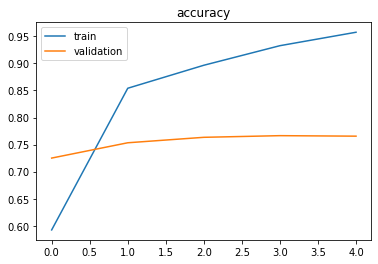

In [116]:
plot_res('accuracy', tfidf_simple_result.history)

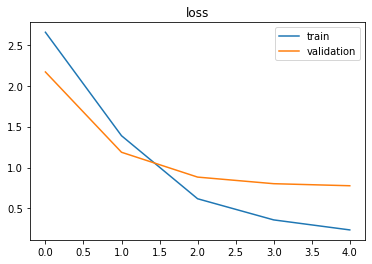

In [117]:
plot_res('loss', tfidf_simple_result.history)

In [118]:
evalute_nn_simple_output(tfidf_model, tfidf_data[2], Y_true)



NAME --------> 

0.7655337227827934


# Simple net using Count Vectorizer

In [119]:
count = CountVectorizer(ngram_range=NGRAM_RANGE)
count_data =  prepare_data_for_nn(INPUT_TUPLE_PREPROCESSED, count)
check_vectorized_dim(count_data)

count_data = (
    count_data[0].astype(np.int8), 
    count_data[1].astype(np.int8), 
    count_data[2].astype(np.int8), 
    count_data[3].astype(np.int8)
)

Train X train: (11314, 37716)
Train Y train: (11314, 20)
Train X test: (7532, 37716)
Train Y test: (7532, 20)


In [120]:
count_model, count_simple_result = nn_simple_model(*count_data)

Epoch 1/5
23/23 [==============================] - 8s 325ms/step - loss: 2.0854 - accuracy: 0.5628 - val_loss: 0.9793 - val_accuracy: 0.7848
Epoch 2/5
23/23 [==============================] - 8s 328ms/step - loss: 0.3104 - accuracy: 0.9554 - val_loss: 0.8471 - val_accuracy: 0.7999
Epoch 3/5
23/23 [==============================] - 7s 317ms/step - loss: 0.1068 - accuracy: 0.9864 - val_loss: 0.8661 - val_accuracy: 0.8039
Epoch 4/5
23/23 [==============================] - 7s 311ms/step - loss: 0.0483 - accuracy: 0.9965 - val_loss: 0.8831 - val_accuracy: 0.8002
Epoch 5/5
23/23 [==============================] - 7s 312ms/step - loss: 0.0305 - accuracy: 0.9986 - val_loss: 0.8981 - val_accuracy: 0.7995


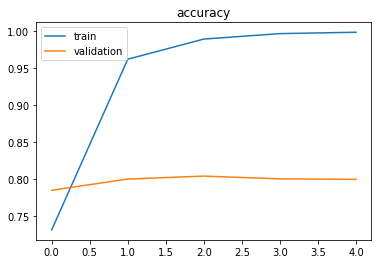

In [121]:
plot_res('accuracy', count_simple_result.history)

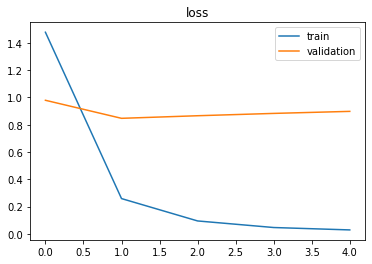

In [122]:
plot_res('loss', count_simple_result.history)

In [123]:
evalute_nn_simple_output(count_model, count_data[2], Y_true)



NAME --------> 

0.799522039298991


In [135]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

In [127]:
len(INPUT_TUPLE_PREPROCESSED)

4

In [144]:
ma = np.max(list(map(lambda x: len(x), INPUT_TUPLE_PREPROCESSED[0])))
mi = np.min(list(map(lambda x: len(x), INPUT_TUPLE_PREPROCESSED[0])))


In [145]:
ma

31041

In [146]:
mi

15

In [182]:
MAX_VOCAB = 15000
EMBEDDING_DIMS = 16
MAX_LEN = ma

In [183]:
MAX_LEN

31041

In [184]:
train_X, train_Y, test_X, test_Y = prepare_data_for_nn(INPUT_TUPLE_PREPROCESSED)

In [185]:
vectorizer = TextVectorization(
    max_tokens=MAX_VOCAB,
    output_sequence_length=int(MAX_LEN),
    output_mode='int',
)

In [186]:
vectorizer.adapt(train_X)

In [187]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'would',
 'use',
 'one',
 'articl',
 'get',
 'like',
 'x',
 'univers',
 'peopl',
 'know',
 'think',
 'make',
 'go',
 'new',
 'also',
 'say',
 'could',
 'time',
 'want',
 'good',
 'even',
 'need',
 'may',
 'look',
 'work',
 'see',
 'mani',
 'system',
 'tri',
 'two',
 'take',
 'much',
 'right',
 'first',
 'way',
 'comput',
 'state',
 'thing',
 'call',
 'come',
 'anyon',
 'seem',
 'problem',
 'year',
 'believ',
 'post',
 'run',
 'us',
 'window',
 'file',
 'find',
 'world',
 'realli',
 'question',
 'sinc',
 'give',
 'someth',
 'read',
 'mean',
 'number',
 'program',
 'still',
 'point',
 'differ',
 'pleas',
 'back',
 'last',
 'must',
 'said',
 'might',
 'drive',
 'includ',
 'part',
 'help',
 'start',
 'god',
 'inform',
 'never',
 'got',
 'ask',
 'gener',
 'set',
 'without',
 'support',
 'sure',
 'tell',
 'govern',
 'put',
 'reason',
 'well',
 'person',
 'anoth',
 'follow',
 'usa',
 'someon',
 'better',
 'key',
 'power',
 'christian',
 'made',
 'space',
 'law',
 'lot',
 'than

# Simple net using Own Embedding

In [188]:
model = Sequential([vectorizer,
                    Embedding(
                        input_dim=MAX_VOCAB,
                        output_dim=EMBEDDING_DIMS),
                    GlobalAveragePooling1D(),
                    Dense(1500, activation='relu'),
                    Dense(LEN_CLASS, activation='softmax')
                   ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_X, train_Y, epochs=EPOCHS,
         validation_data=(test_X, test_Y))

Epoch 1/5
354/354 [==============================] - 61s 171ms/step - loss: 2.9932 - accuracy: 0.0519 - val_loss: 2.9909 - val_accuracy: 0.0527
Epoch 2/5
354/354 [==============================] - 61s 172ms/step - loss: 2.9917 - accuracy: 0.0505 - val_loss: 2.9912 - val_accuracy: 0.0527
Epoch 3/5
 48/354 [===>..........................] - ETA: 39s - loss: 2.9889 - accuracy: 0.0472

In [ ]:
model.summary()

# Simple net using Word2Vec

# Simple net using Glove


# TODO

- Use word2vec with T
- Use glove with T
- Use bert with T
- Use word2vec
- Use glove
- Use bert
- Use tun.. on non deep
- Tun deep
- Make better preprocessing
- Pls make nets without preprocessing
- Lets make a nice API with pipeline to make all experiments and save to CSV

# LSTM

# RNN